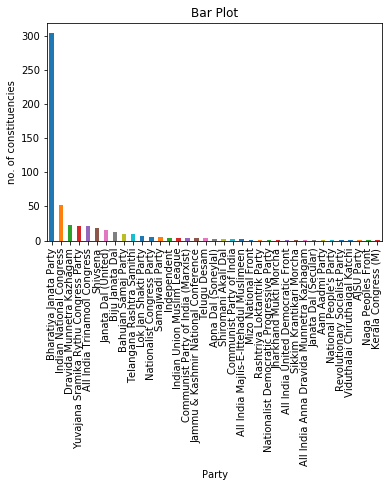

In [1]:
%matplotlib inline      
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
import re

df = pd.read_csv('loksabha.csv')

df.Party.value_counts().plot(kind="bar")
plt.xlabel('Party')
plt.ylabel('no. of constituencies')
plt.title('Bar Plot')
plt.rcParams['figure.figsize']=(70,10)
plt.show()

In [2]:
df = pd.read_csv('loksabha.csv')
single = df.groupby(df.Party)
single1 = single.Percentage.mean()
#print(single)
max_WinMean = max(single1)
TickSym = []
Sym = []
for row in df.Party.iteritems():
    if row[1] not in Sym:
        Sym.append(row[1])
        TickSym.append(row)

i=-1
for j in single1:
    i+=1
    if j==max_WinMean:
        max_avg_ind = i
        
        break;
#print(i)
iMaxSym = Sym[max_avg_ind]
print(iMaxSym)

Indian National Congress


[('Andaman & Nicobar Islands', 45.98), ('Andhra Pradesh', 39.43), ('Andhra Pradesh', 47.33), ('Andhra Pradesh', 51.79)]


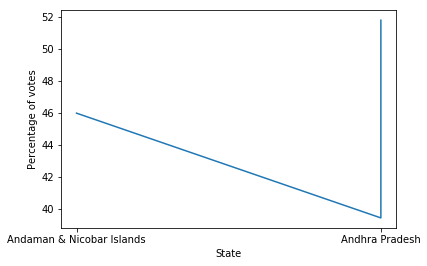

In [16]:
C1Max = []
for i in TickSym:
    if i[1]==iMaxSym:
        iMax=i[0]
        for x in range(iMax,iMax+4):
            C1Max.append((df.State[x],df.Percentage[x]))
print(C1Max)            
state = []
per = []
for k in C1Max :
    state.append(k[0])
    per.append(k[1])

plt.plot(state,per)
plt.xlabel('State')
plt.ylabel('Percentage of votes')
plt.show()
    

In [3]:
print(single1)
max_WinMean = max(single1)
print(max_WinMean)

Party
AJSU Party                                  58.570000
Aam Aadmi Party                             37.400000
All India Anna Dravida Munnetra Kazhagam    43.020000
All India Majlis-E-Ittehadul Muslimeen      45.710000
All India Trinamool Congress                48.107273
All India United Democratic Front           42.660000
Apna Dal (Soneylal)                         49.330000
Bahujan Samaj Party                         50.208000
Bharatiya Janata Party                      55.123861
Biju Janata Dal                             46.922500
Communist Party of India                    48.805000
Communist Party of India (Marxist)          43.540000
Dravida Munnetra Kazhagam                   54.437826
Independent                                 43.785000
Indian National Congress                    47.051731
Indian Union Muslim League                  50.796667
Jammu & Kashmir National Conference         39.533333
Janata Dal (Secular)                        52.960000
Janata Dal (United)   

In [28]:
df.ix[:,['Percentage','Party','State']].head()
v1=df.groupby(['Party','State']).mean()
v1.head(10)

C:\Users\Varsha C\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Votes  \
Party                                    State                              
AJSU Party                               Jharkhand          648277.000000   
Aam Aadmi Party                          Punjab             413561.000000   
All India Anna Dravida Munnetra Kazhagam Tamil Nadu         504813.000000   
All India Majlis-E-Ittehadul Muslimeen   Maharashtra        389042.000000   
                                         Telangana          517471.000000   
All India Trinamool Congress             West Bengal        656707.136364   
All India United Democratic Front        Assam              718764.000000   
Apna Dal (Soneylal)                      Uttar Pradesh      519739.000000   
Bahujan Samaj Party                      Uttar Pradesh      543039.200000   
Bharatiya Janata Party                   Arunachal Pradesh  189839.500000   

                                                            Percentage  
Party                                    State                          
AJSU Party                               Jharkhand           58.570000  
Aam Aadmi Party                          Punjab              37.400000  
All India Anna Dravida Munnetra Kazhagam Tamil Nadu          43.020000  
All India Majlis-E-Ittehadul Muslimeen   Maharashtra         32.470000  
                                         Telangana           58.950000  
All India Trinamool Congress             West Bengal         48.107273  
All India United Democratic Front        Assam               42.660000  
Apna Dal (Soneylal)                      Uttar Pradesh       49.330000  
Bahujan Samaj Party                      Uttar Pradesh       50.208000  
Bharatiya Janata Party                   Arunachal Pradesh   57.700000

In [29]:
v1=v1.reset_index()
v1.head()

,Party,State,Votes,Percentage
0,AJSU Party,Jharkhand,648277.0,58.57
1,Aam Aadmi Party,Punjab,413561.0,37.40
2,All India Anna Dravida Munnetra Kazhagam,Tamil Nadu,504813.0,43.02
3,All India Majlis-E-Ittehadul Muslimeen,Maharashtra,389042.0,32.47
4,All India Majlis-E-Ittehadul Muslimeen,Telangana,517471.0,58.95


In [31]:
v1.pivot('Party','State','Percentage').head(10)

State,Andaman & Nicobar Islands,Andhra Pradesh,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli,Daman & Diu,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Party,,,,,,,,,,,,,,,,,,,,,
AJSU Party,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aam Aadmi Party,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All India Anna Dravida Munnetra Kazhagam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.02,NaN,NaN,NaN,NaN,NaN
All India Majlis-E-Ittehadul Muslimeen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.9500,NaN,NaN,NaN,NaN
All India Trinamool Congress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.107273
All India United Democratic Front,NaN,NaN,NaN,NaN,42.66,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apna Dal (Soneylal),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.330000,NaN,NaN
Bahujan Samaj Party,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.208000,NaN,NaN
Bharatiya Janata Party,NaN,NaN,NaN,57.7,55.47,55.552353,50.64,52.025556,NaN,42.98,...,NaN,46.565,60.586667,NaN,NaN,41.5425,48.945,53.056129,62.106,47.572222


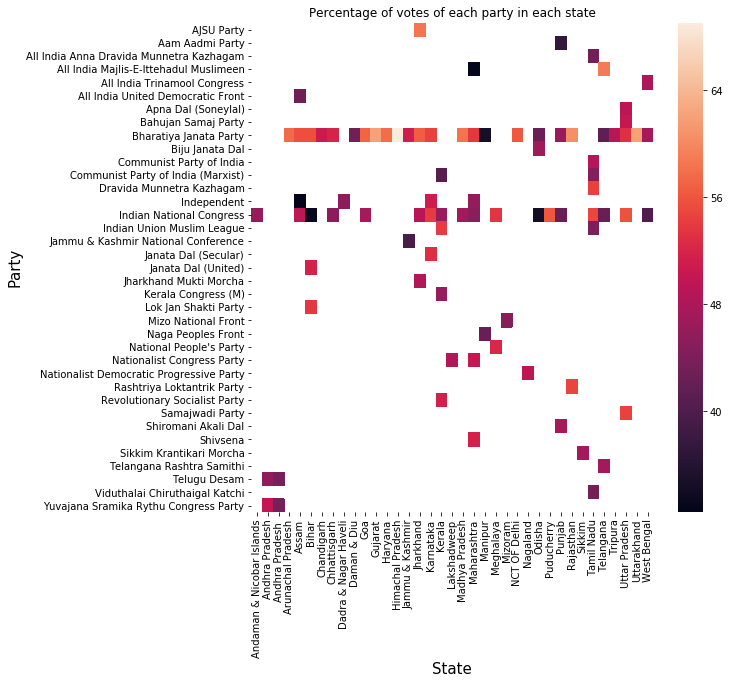

In [35]:
plt.figure(figsize=(9,9))
pivot=v1.pivot('Party','State','Percentage')
plt.xlabel('Party',size=15)
plt.ylabel('State',size=15)
plt.title('Percentage of votes of each party in each state')
#sns.heatmap(pivot, annot=True, fmt=".lf",linewidths=.5,square=True)
sns.heatmap(pivot)